In [1]:
from sympy import binomial

# Chem 30324, Spring 2025, Homework 1

# Due on January 24, 2025

## Problem 1: Discrete, probably

*In five card study, a poker player is dealt
five cards from a standard deck of 52 cards.*

### 1. How many different 5-card hands are there?  (Remember, in poker the order in which the cards are received does *not* matter.)

In [2]:
# Total number of cards and cards dealt
n = 52
r = 5

# Number of different 5-card hands
num_hands = binomial(n, r)
print("There are", num_hands, "different 5-card hands")

There are 2598960 different 5-card hands


### 2. What is the probability of being dealt four of a kind (a card of the same rank from each suit in a five card hand)?

In [3]:
# Calculate the total number of hands
total_hands = binomial(52, 5)

# Calculate the number of four-of-a-kind hands
four_of_a_kind_hands = 13 * 48

# Calculate the probability
probability_four_of_a_kind = four_of_a_kind_hands / total_hands

print(f"The probability of being dealt four of a kind is: {probability_four_of_a_kind:.8f}")


The probability of being dealt four of a kind is: 0.00024010


### 3. What is the probability of being dealt a flush (five cards of the same suit)?

In [4]:
# Calculate the total number of hands
total_hands = binomial(52, 5)

# Calculate the number of flush hands
flush_hands = 4 * binomial(13, 5) - 40

# Calculate the probability
probability_flush = flush_hands / total_hands

# Print the result
print(f"The probability of being dealt a flush is: {probability_flush:.8f}")

The probability of being dealt a flush is: 0.00196540


## Problem 2: Continuous, probably

The probability distribution function for a random variable $x$ is given by $P(x)=x e^{-2x}, 0\le x < \infty$.

### 1. Is $P(x)$ normalized?  If not, normalize it.  Plot the normalized $P(x)$.

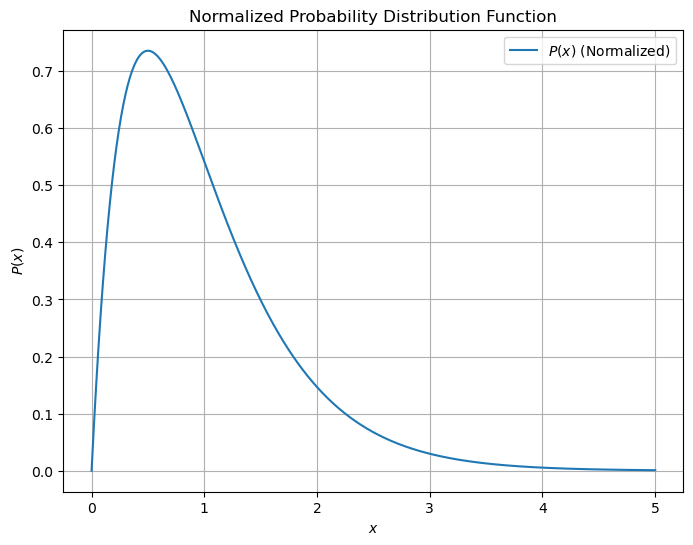

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the variables and function
x = sp.symbols('x', positive=True)
P = x * sp.exp(-2 * x)

# 1. Check normalization
normalization_integral = sp.integrate(P, (x, 0, sp.oo))

# If not normalized, calculate normalization constant
normalization_constant = 1 / normalization_integral
P_normalized = normalization_constant * P

x_vals = np.linspace(0, 5, 500)
P_normalized_func = sp.lambdify(x, P_normalized, 'numpy')
P_vals = P_normalized_func(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, P_vals, label=r"$P(x)$ (Normalized)")
plt.title("Normalized Probability Distribution Function")
plt.xlabel("$x$")
plt.ylabel("$P(x)$")
plt.grid(True)
plt.legend()
plt.show()

### 2. What is the most probable value of $x$?

In [6]:
P_derivative = sp.diff(P_normalized, x)
most_probable_value = sp.solve(P_derivative, x)
[float(v) for v in most_probable_value]

[0.5]

### 3. What is the expectation value of $x$?

In [7]:
expectation_value = sp.integrate(x * P_normalized, (x, 0, sp.oo))
float(expectation_value)

1.0

### 4. What is the variance of $x$?

In [8]:
x_squared_expectation = sp.integrate(x**2 * P_normalized, (x, 0, sp.oo))
variance = x_squared_expectation - expectation_value**2
float(variance)

0.5

## Problem 3: One rough night

It's late on a Friday night and people are stumbling up Notre Dame Ave. to their dorms. You observe one particularly impaired individual who is taking steps of equal length 1m to the north or south (i.e., in one dimension), with equal probability.

In [9]:
from math import comb
import matplotlib.pyplot as plt

# Parameters for the random walk
n_steps = 20
step_size = 1
p = 0.5  # Probability for each direction

# Calculate distances and probabilities
distances = np.arange(-n_steps, n_steps + 1, 2)
probabilities = [comb(n_steps, (n_steps + d) // 2) * (p**n_steps) for d in distances]

In [10]:
distances

array([-20, -18, -16, -14, -12, -10,  -8,  -6,  -4,  -2,   0,   2,   4,
         6,   8,  10,  12,  14,  16,  18,  20])

In [11]:
probabilities

[9.5367431640625e-07,
 1.9073486328125e-05,
 0.0001811981201171875,
 0.001087188720703125,
 0.004620552062988281,
 0.0147857666015625,
 0.03696441650390625,
 0.0739288330078125,
 0.12013435363769531,
 0.16017913818359375,
 0.17619705200195312,
 0.16017913818359375,
 0.12013435363769531,
 0.0739288330078125,
 0.03696441650390625,
 0.0147857666015625,
 0.004620552062988281,
 0.001087188720703125,
 0.0001811981201171875,
 1.9073486328125e-05,
 9.5367431640625e-07]

### 1. What is the furthest distance the person could travel after 20 steps?

In [12]:
n_steps

20

### 2. What is the probability that the person won't have traveled any net distance at all after 20 steps?

In [13]:
prob_zero_distance = probabilities[np.where(distances==0)[0][0]]
prob_zero_distance

0.17619705200195312

### 3. What is the probability that the person has traveled half the maximum distance after 20 steps?

In [14]:
prob_half_max_distance = probabilities[np.where(distances==10)[0][0]]+probabilities[np.where(distances==-10)[0][0]]
prob_half_max_distance

0.029571533203125

### 4. Plot the probability of traveling a given distance vs distance. Does the probability distribution look familiar?  You'll see it again when we talk about diffusion.

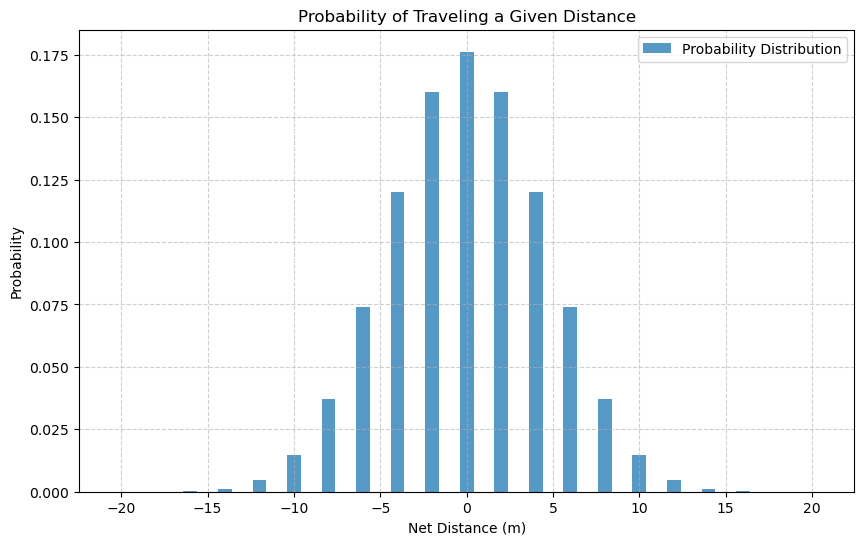

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(distances, probabilities, width=0.8, alpha=0.75, label="Probability Distribution")
plt.title("Probability of Traveling a Given Distance")
plt.xlabel("Net Distance (m)")
plt.ylabel("Probability")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

## Problem 4: Now this is what I call equilibrium

The Boltzmann distribution tells us that, at thermal equilibrium, the probability of a particle having an energy $E(q,p)$ is proportional to $\exp(-E(q,p)/k_\text{B}T)$, where $k_\text{B}$ is the Boltzmann constant and $q$ and $p$ are position and momentum ($p=mv$), respectively.  Suppose a bunch of Ar molecules are in thermal equilibrium at temperature $T$ and are traveling back and forth in one dimension with various momenta and kinetic energies $K=p^2/2$.

### 1. What is the expectation value of the momentum $p$ of an Ar molecule?

following along with Ex. kinetic energy in Lecture 1-Probability pdf
and using information from the class outline and the Temperature example:
\begin{equation}
-inf < p_x < inf
\end{equation}

\begin{equation}
KE(p_x) = \frac{(p_x)^2}{(2m)}
\end{equation}

\begin{equation}
\Phi(p_x) \propto e^{-\frac{p_x^2}{2mk_bT}}
\end{equation}


Calculating the Normalization factor:
\begin{equation}
\int_{-inf}^{inf}\Phi(p_x) = \sqrt{2 \pi m k_b T}
\end{equation}

gives normalized probability distribution
\begin{equation}
\Phi(p_x) = \sqrt{\frac{1}{(2 \pi m k_b T}} e^{-\frac{p^2}{2m*kb*T}}
\end{equation}

Comparing this distribution to the gaussian curve equation gives the following:
\begin{equation}
<p_x>=\mu = 0
\end{equation}

This makes intuitive sense as the momentum is the velocity scaled by the mass and the expectation value of the velocity is also 0.

### 2. What is the expectation value of the kinetic energy $K$ of an Ar molecule?

By comparing the normalized equation to the gaussian distribution
\begin{equation}
<p_x^2>=\mu=mk_bT
\end{equation}
plugging this into the equation for KE gives:
\begin{equation}
<KE(p_x)>=\frac{<p_x^2>}{2m}=\frac{mk_bT}{2m}=\frac{k_bT}{2}
\end{equation}
This also matches the value when calculating $<KE>$ using velocity

### 3. How would your answers change if the molecules were Xe?

As neither answer is dependent on mass, neither answer would change

####Solving 2.4 via code

In [16]:
#The following is just graphing the calculated momentums and probabilities/propagating calculations
#while checking we match the above results
#
#There are some unintuitive results on the y axis due to the small scale
#additionally both using the explicit normalization factor and numeric integration are used
#and propagated to give the expectation value.
#
#Libraries and code altered from code given by Temperature example
#in the chem30324 outline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize,fsolve
from scipy.misc import derivative

#Defining Variables and probability function, can play around and see how mass/T affects phi
#mass of 1 Argon atom in kg
m = 6.634e-26
#room temperature in kelvin
T = 293
#boltzman constant in Joules/Kelvin
k = 1.4e-23
#pi
pi = 3.14

#Defining our initial probability equation
def phif(p):
  return np.exp(-(p**2)/(2*m*k*T))

Text(0, 0.5, 'Relative Probability (1/(N s))')

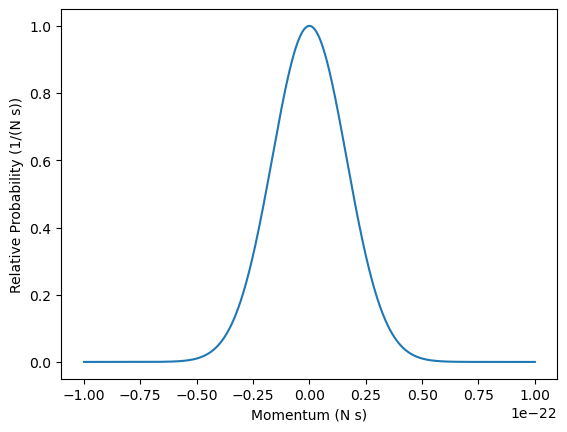

In [17]:
#defines p as a 1000 digits spaced between -1e-25 and 1e-25, change these first 2 variables if your graph
#leaves the bounds of the area
p = np.linspace(-1e-22,1e-22, 1000)
#calculates probabilities of each point p given our previously defined function
phi = phif(p)
#plots function, axes are being multiplied by the values near the corners, hard to tell
#if its normalized or not, use integration to check
plt.plot(p,phi)
plt.xlabel('Momentum (N s)')
plt.ylabel('Relative Probability (1/(N s))')

normalization check:  1.0002535737644458


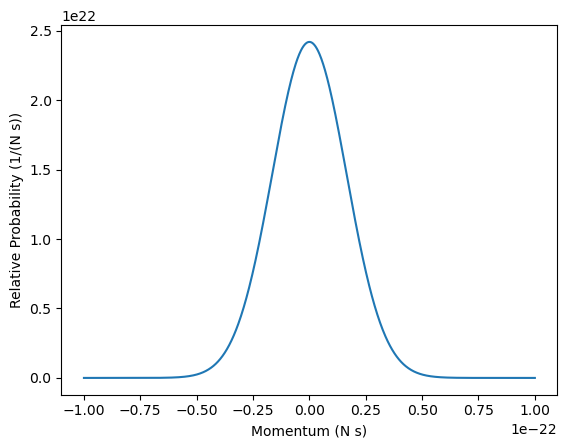

In [18]:
#using the calculated normalization from the first section:

def phif_norm(p):
  return (1/(2*pi*m*k*T))**(1/2)*np.exp(-(p**2)/(2*m*k*T))

phi2 = phif_norm(p)
#plots function, axes are being multiplied by the values near the corners, hard to tell
#if its normalized or not, use integration to check
plt.plot(p,phi2)
plt.xlabel('Momentum (N s)')
plt.ylabel('Relative Probability (1/(N s))')

N,err = quad(phif_norm, -1e-22,1e-22)
print("normalization check: ", N)

#The y axis is unintuitive because of how small the x axis is

Normalization factor:  4.134999822091436e-23
Normalization check:  1.0000000000000002


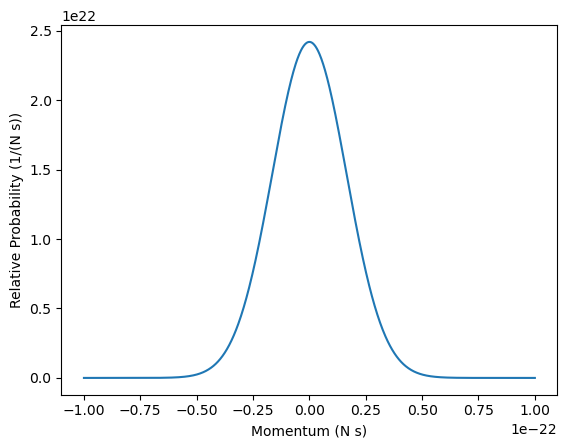

In [19]:
#Normalization using the same numerical technique in the Temperature example
#quad function takes the function, then bounds as parameters and returns the integral

N,err = quad(phif, -1e-22,1e-22)
print('Normalization factor: ', N)

def phif_norm2(p):
  return phif(p)/N

#We'll graph the updated probability density
#plots function, axes are being multiplied by the values near the corners, hard to tell
#if its normalized or not, use integration to check

plt.plot(p,phif_norm2(p))
plt.xlabel('Momentum (N s)')
plt.ylabel('Relative Probability (1/(N s))')

#Check that this returns 1 to see if its normalized
N2, err2 = quad(phif_norm2, -1e-22,1e-22)
print('Normalization check: ', N2)

The likeliest root is:  [0.]
The likeliest root from is:  [0.]


/var/folders/q6/rht3cgz963nfr4rnm8vlcrg00000gr/T/ipykernel_74644/4010578929.py:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(phif_norm, p,dx=1e-24)
/var/folders/q6/rht3cgz963nfr4rnm8vlcrg00000gr/T/ipykernel_74644/4010578929.py:16: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(phif_norm2, p,dx=1e-24)


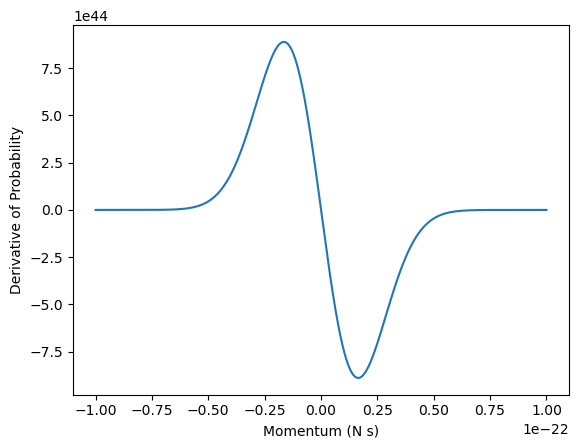

In [20]:
#using derivative of our calculated normalized phi to find the maximum of the normalized graphs
#Looking for the roots/inflection point
def phi_prime(p):
  return derivative(phif_norm, p,dx=1e-24)

plt.plot(p,phi_prime(p))
plt.xlabel('Momentum (N s)')
plt.ylabel('Derivative of Probability')

pguess = 0
root=fsolve(phi_prime, pguess)
print('The likeliest root is: ', root)

#using derivative of our numerically integrated normalized phi to find the maximum of the normalized graphs
def phi_prime2(p):
  return derivative(phif_norm2, p,dx=1e-24)

root=fsolve(phi_prime2, pguess)
print('The likeliest root from is: ', root)

In [21]:
#Integrating p*phi(p) to get <p>

def pphif(p):
  return p*phif_norm(p)
pbar,err = quad(pphif,-1e-22,1e-22)
print('The expectation value of momentum is: ', pbar)

def pphif2(p):
  return p*phif_norm2(p)
pbar2,err = quad(pphif2,-1e-22,1e-22)
print('The expectation value of momentum is: ', pbar2)

#integrating p^2*phi(p) to get <p^2>
def p2phif(p):
  return p**2*phif_norm(p)
p2bar,err = quad(p2phif,-1e-22,1e-22)
print('The expectation value of momentum squared is: ', p2bar)

#integrating p^2*phi(p) to get <p^2>
def p2phif2(p):
  return p**2*phif_norm2(p)
p2bar2,err = quad(p2phif2,-1e-22,1e-22)
print('The expectation value of momentum squared is: ', p2bar2)

print('Using our calculated expectation for the momentum squared:', m*k*T)

#plugging values into kinetic energy, keeping in mind we've already squared the momentum:
print('kinetic energy: ', p2bar/(2*m))
print('kinetic energy: ', p2bar2/(2*m))
print('kinetic energy; ', k*T/(2))

The expectation value of momentum is:  0.0
The expectation value of momentum is:  0.0
The expectation value of momentum squared is:  2.721956703892415e-46
The expectation value of momentum squared is:  2.7212666620608567e-46
Using our calculated expectation for the momentum squared: 2.7212668e-46
kinetic energy:  2.051519975800735e-21
kinetic energy:  2.05099989603622e-21
kinetic energy;  2.0509999999999997e-21
